# Project: Dog vs Cat Classification

In [111]:
from pathlib import Path
import os
import torch
from torch import nn

In [112]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [113]:
data_path = Path("data/")
train_path = data_path / "train"
test_path = data_path / "test"

train_path, test_path

(WindowsPath('data/train'), WindowsPath('data/test'))

In [114]:
from PIL import Image
import random
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Cat, Shape: (419, 408, 3)')

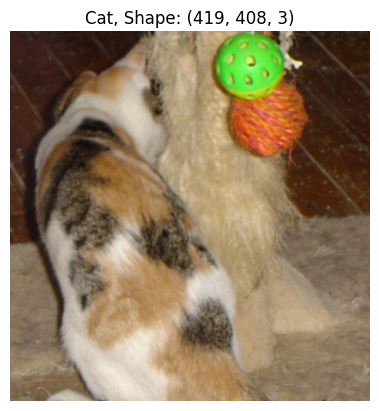

In [115]:
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
image_path_list = list(data_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)
img_is_array = np.asarray(img)

plt.imshow(img)
plt.axis(False)
plt.title(f"{image_class}, Shape: {img_is_array.shape}")

In [116]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [117]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [118]:
transformed_image = data_transform(img)
transformed_image

tensor([[[0.2000, 0.1961, 0.2118,  ..., 0.1843, 0.1961, 0.1765],
         [0.2196, 0.2235, 0.2196,  ..., 0.1922, 0.1725, 0.1569],
         [0.2353, 0.2431, 0.2392,  ..., 0.1882, 0.1961, 0.1843],
         ...,
         [0.5020, 0.5098, 0.5059,  ..., 0.5412, 0.5412, 0.5255],
         [0.4941, 0.4824, 0.4784,  ..., 0.5294, 0.5216, 0.5059],
         [0.4902, 0.4941, 0.5059,  ..., 0.5294, 0.5333, 0.5333]],

        [[0.1255, 0.1176, 0.1255,  ..., 0.1216, 0.1373, 0.1216],
         [0.1137, 0.1176, 0.1176,  ..., 0.1137, 0.0980, 0.0941],
         [0.1216, 0.1216, 0.1216,  ..., 0.1098, 0.1098, 0.1020],
         ...,
         [0.4157, 0.4235, 0.4157,  ..., 0.4627, 0.4627, 0.4510],
         [0.4039, 0.3961, 0.3961,  ..., 0.4510, 0.4471, 0.4314],
         [0.4157, 0.4235, 0.4431,  ..., 0.4549, 0.4627, 0.4588]],

        [[0.1098, 0.0980, 0.1098,  ..., 0.0745, 0.0902, 0.0667],
         [0.1098, 0.1020, 0.1020,  ..., 0.0627, 0.0471, 0.0471],
         [0.1059, 0.1020, 0.1020,  ..., 0.0549, 0.0549, 0.

Text(0.5, 1.0, 'Cat, Shape: torch.Size([3, 64, 64])')

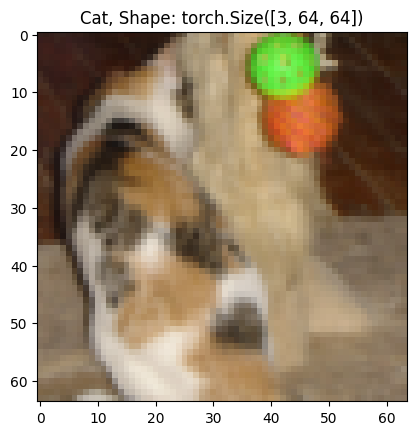

In [119]:
plt.imshow(transformed_image.permute(1, 2, 0))
plt.title(f"{image_class}, Shape: {transformed_image.shape}")

# Loading data using 'ImageFolder'

In [120]:
train_data = datasets.ImageFolder(root=train_path,
                                  transform=data_transform)

test_data = datasets.ImageFolder(root=test_path,
                                 transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 160
     Root location: data\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 42
     Root location: data\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [121]:
# Get class names as list
class_names = train_data.classes
class_names

['Cat', 'Dog']

In [122]:
# Get class names as dictionary 
class_dict = train_data.class_to_idx
class_dict

{'Cat': 0, 'Dog': 1}

In [123]:
len(train_data), len(test_data)

(160, 42)

# Turn loaded images into 'DataLoader'

In [124]:
BATCH_SIZE = 32
NUM_WORKERS = 0

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=NUM_WORKERS,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x25f31e01bb0>,
 <torch.utils.data.dataloader.DataLoader at 0x25f31e629d0>)

In [125]:
img_custom, label_custom = next(iter(train_dataloader))

img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [126]:
class DogVsCat(nn.Module):
    def __init__(self, input_shape, hidden_layers, output_shape):
        super().__init__()

        self.conv_block_layer_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_layers,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_layers,
                      out_channels=hidden_layers,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )

        self.conv_block_layer_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_layers,
                      out_channels=hidden_layers,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_layers,
                      out_channels=hidden_layers,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )

        self.classification = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_layers*16*16,
                      out_features=output_shape)
        )

    def forward(self, x):
        #print(f"Shape: {x.shape}")
        x = self.conv_block_layer_1(x)
        #print(f"Shape: {x.shape}")
        x = self.conv_block_layer_2(x)
        #print(f"Shape: {x.shape}")
        x = self.classification(x)
        #print(f"Shape: {x.shape}")
        return x
        

In [127]:
model_0 = DogVsCat(input_shape=3, hidden_layers=16, output_shape=1).to(device)
model_0

DogVsCat(
  (conv_block_layer_1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_layer_2): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classification): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=4096, out_features=1, bias=True)
  )
)

In [128]:
# Setup loss function and optimizer
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

loss_fn, optimizer

(BCEWithLogitsLoss(),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.001
     maximize: False
     weight_decay: 0
 ))

In [129]:
# Check the correct shape on dummy tensor
dummy_input = torch.randn(32, 3, 64, 64)
output = model_0(dummy_input.to(device))
output

tensor([[0.0726],
        [0.0803],
        [0.0956],
        [0.0668],
        [0.0640],
        [0.0904],
        [0.0682],
        [0.0826],
        [0.0590],
        [0.0870],
        [0.0669],
        [0.0642],
        [0.0752],
        [0.0754],
        [0.0612],
        [0.0776],
        [0.0730],
        [0.0649],
        [0.0680],
        [0.0912],
        [0.0969],
        [0.0732],
        [0.0937],
        [0.0815],
        [0.0924],
        [0.0618],
        [0.0721],
        [0.0676],
        [0.0656],
        [0.0845],
        [0.0957],
        [0.0877]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [130]:
from tqdm import tqdm
import time

In [131]:
epochs = 20

start_time = time.time()

results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []}

for epoch in tqdm(range(epochs)):

    model_0.train()
    train_loss, train_acc = 0, 0
    
    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)

        y = y.unsqueeze(dim=1).float()
        
        y_pred = model_0(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        
        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        y_pred_class = (torch.sigmoid(y_pred) > 0.5).float()
        train_acc += (y_pred_class==y).sum().item() / len(y_pred)

    train_loss /= len(train_dataloader)
    train_acc = (train_acc / len(train_dataloader)) * 100
    
    model_0.eval()
    test_loss, test_acc = 0, 0
    
    with torch.inference_mode():
        for batch, (X, y) in enumerate(test_dataloader):
            X, y = X.to(device), y.to(device)

            y = y.unsqueeze(dim=1).float()
        
            test_pred = model_0(X)

            loss = loss_fn(test_pred, y)
            test_loss += loss.item()

            test_pred_class = (torch.sigmoid(test_pred) > 0.5).float()
            test_acc += (test_pred_class==y).sum().item() / len(test_pred)
    
        test_loss /= len(test_dataloader)
        test_acc = (test_acc / len(test_dataloader)) * 100

    print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f} | Test Loss: {test_loss}, Test Accuracy: {test_acc}")

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)
    


end_time = time.time()
train_time = end_time - start_time

print(f"Total time: {train_time}")

  5%|▌         | 1/20 [00:00<00:11,  1.71it/s]

Epoch: 0 | Train Loss: 0.6944, Train Accuracy: 50.00 | Test Loss: 0.7092080414295197, Test Accuracy: 32.8125


 10%|█         | 2/20 [00:01<00:09,  1.94it/s]

Epoch: 1 | Train Loss: 0.6948, Train Accuracy: 50.00 | Test Loss: 0.7047411501407623, Test Accuracy: 32.8125


 15%|█▌        | 3/20 [00:01<00:08,  1.95it/s]

Epoch: 2 | Train Loss: 0.6940, Train Accuracy: 50.00 | Test Loss: 0.699346661567688, Test Accuracy: 32.8125


 20%|██        | 4/20 [00:02<00:08,  1.99it/s]

Epoch: 3 | Train Loss: 0.6943, Train Accuracy: 49.38 | Test Loss: 0.6819287240505219, Test Accuracy: 67.1875


 25%|██▌       | 5/20 [00:02<00:06,  2.18it/s]

Epoch: 4 | Train Loss: 0.6915, Train Accuracy: 50.00 | Test Loss: 0.6859443485736847, Test Accuracy: 68.75


 30%|███       | 6/20 [00:02<00:05,  2.33it/s]

Epoch: 5 | Train Loss: 0.6949, Train Accuracy: 51.25 | Test Loss: 0.6988559663295746, Test Accuracy: 39.6875


 35%|███▌      | 7/20 [00:03<00:05,  2.38it/s]

Epoch: 6 | Train Loss: 0.6892, Train Accuracy: 55.62 | Test Loss: 0.6844340562820435, Test Accuracy: 70.3125


 40%|████      | 8/20 [00:03<00:04,  2.47it/s]

Epoch: 7 | Train Loss: 0.6884, Train Accuracy: 60.62 | Test Loss: 0.6867957413196564, Test Accuracy: 70.0


 45%|████▌     | 9/20 [00:04<00:04,  2.24it/s]

Epoch: 8 | Train Loss: 0.6865, Train Accuracy: 63.75 | Test Loss: 0.6830866634845734, Test Accuracy: 68.4375


 50%|█████     | 10/20 [00:04<00:04,  2.36it/s]

Epoch: 9 | Train Loss: 0.6812, Train Accuracy: 60.00 | Test Loss: 0.6809307038784027, Test Accuracy: 65.0


 55%|█████▌    | 11/20 [00:04<00:03,  2.44it/s]

Epoch: 10 | Train Loss: 0.6766, Train Accuracy: 61.88 | Test Loss: 0.6773404777050018, Test Accuracy: 65.0


 60%|██████    | 12/20 [00:05<00:03,  2.50it/s]

Epoch: 11 | Train Loss: 0.6733, Train Accuracy: 56.88 | Test Loss: 0.6726290881633759, Test Accuracy: 63.4375


 65%|██████▌   | 13/20 [00:05<00:02,  2.58it/s]

Epoch: 12 | Train Loss: 0.6584, Train Accuracy: 61.88 | Test Loss: 0.6435657143592834, Test Accuracy: 67.1875


 70%|███████   | 14/20 [00:05<00:02,  2.58it/s]

Epoch: 13 | Train Loss: 0.6569, Train Accuracy: 62.50 | Test Loss: 0.6536679565906525, Test Accuracy: 66.875


 75%|███████▌  | 15/20 [00:06<00:02,  2.46it/s]

Epoch: 14 | Train Loss: 0.6313, Train Accuracy: 60.62 | Test Loss: 0.6640700399875641, Test Accuracy: 66.5625


 80%|████████  | 16/20 [00:06<00:01,  2.40it/s]

Epoch: 15 | Train Loss: 0.6169, Train Accuracy: 65.62 | Test Loss: 0.7119698822498322, Test Accuracy: 52.81249999999999


 85%|████████▌ | 17/20 [00:07<00:01,  2.35it/s]

Epoch: 16 | Train Loss: 0.6011, Train Accuracy: 67.50 | Test Loss: 0.6393845528364182, Test Accuracy: 62.18749999999999


 90%|█████████ | 18/20 [00:07<00:00,  2.31it/s]

Epoch: 17 | Train Loss: 0.5604, Train Accuracy: 71.88 | Test Loss: 0.6692589819431305, Test Accuracy: 69.6875


 95%|█████████▌| 19/20 [00:08<00:00,  2.29it/s]

Epoch: 18 | Train Loss: 0.5697, Train Accuracy: 71.25 | Test Loss: 0.6483534276485443, Test Accuracy: 66.5625


100%|██████████| 20/20 [00:08<00:00,  2.31it/s]

Epoch: 19 | Train Loss: 0.5155, Train Accuracy: 74.38 | Test Loss: 0.7287901341915131, Test Accuracy: 66.25
Total time: 8.665189981460571


# Plot model_0 results

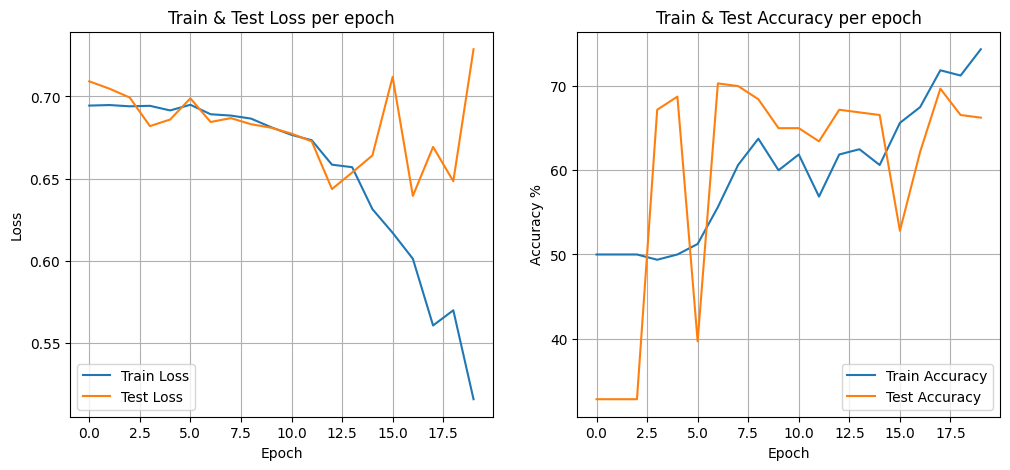

In [132]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), results["train_loss"], label="Train Loss")
plt.plot(range(epochs), results["test_loss"], label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train & Test Loss per epoch")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), results["train_acc"], label="Train Accuracy")
plt.plot(range(epochs), results["test_acc"], label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy %")
plt.title("Train & Test Accuracy per epoch")
plt.legend()
plt.grid()



In [133]:
print(len(results["train_loss"]), len(results["test_loss"]))
print(len(results["train_acc"]), len(results["test_acc"]))

20 20
20 20
